In [145]:
!pip install -U yellowbrick



In [151]:
#Decision Tree Regression 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score


In [153]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [155]:
dataset

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0
3896,49,male,yes,70,123/75,60,213.0
3897,56,male,yes,70,125/79,60,246.0
3898,50,male,yes,85,134/95,60,340.0


In [157]:
dataset = dataset.fillna(0)
dataset = pd.get_dummies(dataset, columns=['sex'])
#dataset['sex'] = dataset['sex'].replace({'male': 0, 'female': 1})
#print(dataset_dummies)

dataset['current_smoker'] = dataset['current_smoker'].replace({'yes': 1, 'no': 0})
dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
dataset = dataset.drop(['blood_pressure'], axis=1)

In [159]:
dataset['blood_pressure_systolic'] = pd.to_numeric(dataset['blood_pressure_systolic'], errors='coerce').fillna(0)
dataset['blood_pressure_diastolic'] = pd.to_numeric(dataset['blood_pressure_diastolic'], errors='coerce').fillna(0)

In [161]:
dataset.describe()

,age,current_smoker,heart_rate,cigs_per_day,chol,blood_pressure_systolic,blood_pressure_diastolic
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,0.495385,75.688974,9.135641,236.171282,132.395385,82.987179
std,8.559275,0.500043,12.015376,12.028875,45.452786,21.976335,11.918623
min,32.000000,0.000000,44.000000,0.000000,0.000000,83.500000,48.000000
25%,42.000000,0.000000,68.000000,0.000000,205.000000,117.000000,75.000000
50%,49.000000,0.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,1.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,1.000000,143.000000,70.000000,696.000000,295.000000,142.500000


In [163]:
X = dataset.drop(["chol"], axis = 1)

Y = dataset['chol']


In [165]:
X.shape

(3900, 8)

In [167]:
#print(X[:10])

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [171]:
print (X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(3120, 8) (780, 8) (3120,) (780,)


In [173]:
dtr = DecisionTreeRegressor().fit(X_train, Y_train)

In [175]:
print('The training r_sq is: % 2f' % dtr.score(X_train, Y_train))

The training r_sq is:  1.000000


In [177]:

Y_pred_train = dtr.predict(X_train)
Y_pred = dtr.predict(X_test)

In [179]:
print ('The r_sq is: ', r2_score(Y_train, Y_pred_train))
print('mean_absolute_error is: ', mean_absolute_error(Y_train, Y_pred_train) )
print('mean_squared_error is:' , mean_squared_error(Y_train, Y_pred_train) )
print('explained_variance_score is:' , explained_variance_score(Y_train, Y_pred_train) )

The r_sq is:  1.0
mean_absolute_error is:  0.0
mean_squared_error is: 0.0
explained_variance_score is: 1.0


In [181]:

print('The testing r_sq is: %.2f' % r2_score(Y_test, Y_pred))
print('The testing r_sq (using dtr.score) is: %.2f' % dtr.score(X_test, Y_test))


The testing r_sq is: -0.89
The testing r_sq (using dtr.score) is: -0.89


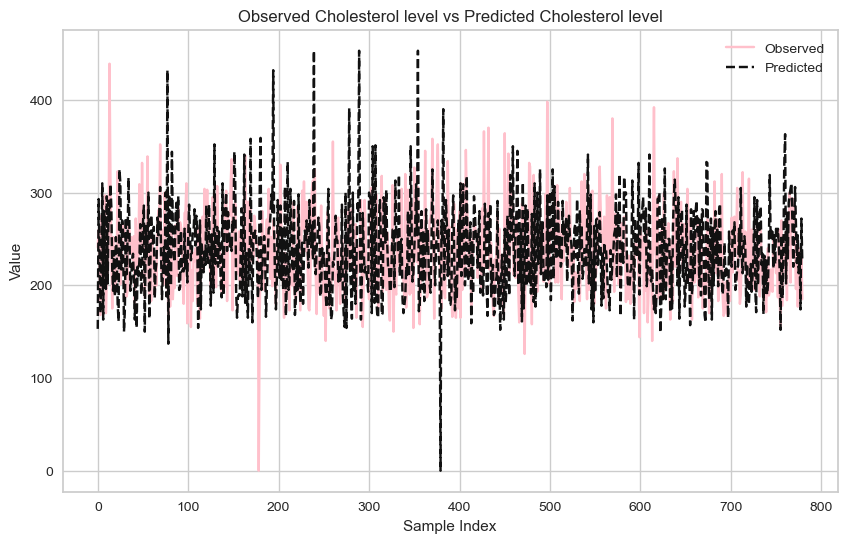

In [183]:
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10, 6)
X_ax = range(len(Y_test))

plt.plot(X_ax, Y_test, label='Observed', color='pink', linestyle='-')
plt.plot(X_ax, Y_pred, label='Predicted', color='k', linestyle='--')

plt.xlabel("Sample Index") 
plt.ylabel("Value")  
plt.title("Observed Cholesterol level vs Predicted Cholesterol level")
plt.legend()
plt.show()




C:\Users\mmerk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


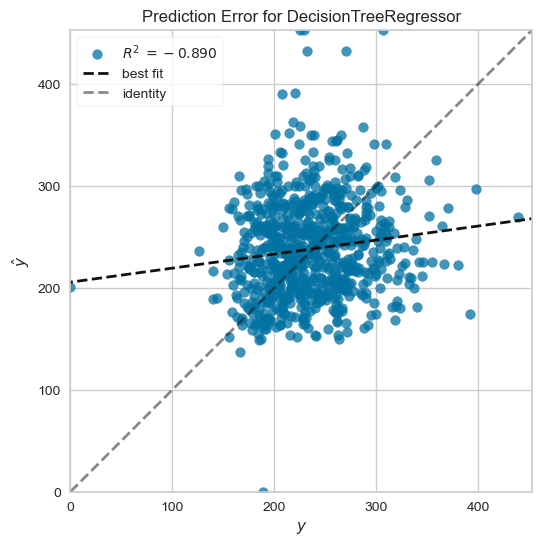

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [196]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(dtr)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()
#visualizer.show()





C:\Users\mmerk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


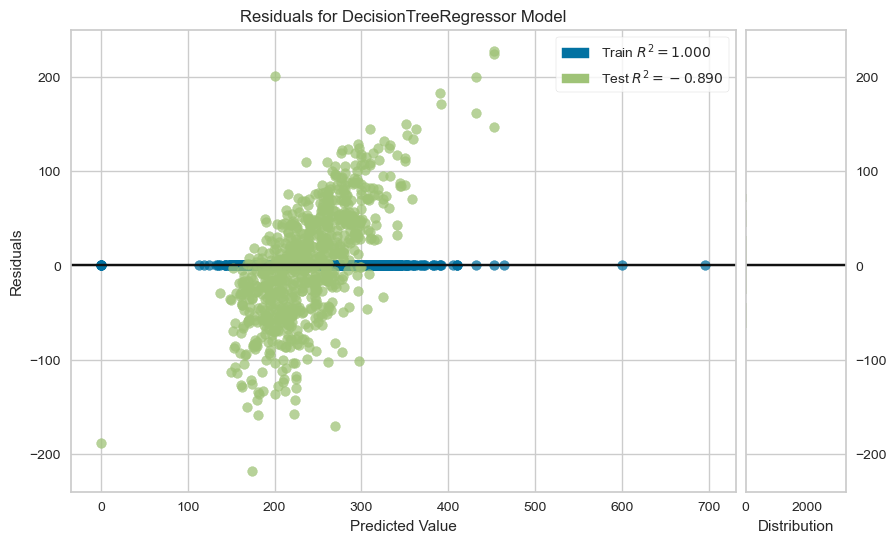

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [198]:
visualizer = ResidualsPlot(dtr)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()
#visualizer.show()


In [200]:
print('mean_absolute_error is' , mean_absolute_error(Y_test, Y_pred))
print('mean_squared_error is:' , mean_squared_error(Y_test, Y_pred))
print('explained_variance_score is:' , explained_variance_score(Y_test, Y_pred))

mean_absolute_error is 48.24230769230769
mean_squared_error is: 3789.3346153846155
explained_variance_score is: -0.8869908310058767


In [208]:
from sklearn.model_selection import cross_val_score

score_train = cross_val_score(dtr, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)


In [210]:
score_train 

array([-3439.53846154, -3256.54166667, -4402.15705128, -4759.96153846,
       -4815.37820513, -3808.32051282, -3930.17628205, -3822.59615385,
       -4830.58333333, -4939.25      ])

In [212]:
score_train = np.mean(score_train)

In [214]:
score_train

-4200.450320512821

In [218]:
#make positive
from numpy import absolute
score_train = absolute(score_train)
score_train 

4200.450320512821

In [228]:
score_test  = cross_val_score(dtr, X_test, Y_test, scoring = 'neg_mean_squared_error', cv=10)
score_train 

array([-3499.35897436, -3465.96153846, -3404.11538462, -3329.        ,
       -3684.96153846, -3329.6025641 , -4045.93589744, -3854.42307692,
       -3859.8974359 , -2547.96153846])

In [230]:
score_test = absolute(np.mean(score_test))
score_test

3626.9820512820506

In [249]:

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


regressor = DecisionTreeRegressor(max_depth=10)

regressor.fit(X_train, Y_train)

predictions = regressor.predict(X_test)

r_square = metrics.r2_score(Y_test, predictions)

print("R-squared Score:", r_square)



R-squared Score: -0.38884219829663014
